In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\Varshith\OneDrive\Desktop\bird_flu_dataset.csv")

# Display the first few rows of the dataset
data.head()


,Date,Location,Strain,Number of Affected Birds,Measures Taken,Human Cases,Comments,Outbreak
0,2021-01-05,Jaipur,H5N1,10000,"Culling, Movement Restrictions",0,Major outbreak in poultry farm,1
1,2021-01-10,Kota,H5N1,5000,"Culling, Disinfection",0,Spread to nearby farms,0
2,2021-01-15,Jodhpur,H5N1,3500,"Culling, Surveillance",0,Early detection helped control spread,0
3,2021-01-20,Ajmer,H5N1,7000,"Culling, Public Awareness",0,Implemented rapid response,1
4,2021-02-01,Bikaner,H5N1,4800,"Culling, Quarantine Measures",0,Coordinated with local farms,1


In [2]:

data.describe()


,Number of Affected Birds,Human Cases,Outbreak
count,26.000000,26.0,26.000000
mean,5084.615385,0.0,0.538462
std,2096.796091,0.0,0.508391
min,1900.000000,0.0,0.000000
25%,3525.000000,0.0,0.000000
50%,4650.000000,0.0,1.000000
75%,6425.000000,0.0,1.000000
max,10000.000000,0.0,1.000000


In [3]:
df = pd.DataFrame(data)

In [37]:
data.fillna(method='ffill', inplace=True)

# Convert 'Date' column to datetime with correct format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Feature Engineering
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Season'] = data['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')

# Check if 'Location' and 'Strain' columns exist before encoding
categorical_columns = ['Location', 'Strain', 'Season']
existing_columns = [col for col in categorical_columns if col in data.columns]
if existing_columns:
    data = pd.get_dummies(data, columns=existing_columns, drop_first=True)

# Splitting Data
X = data.drop(columns=['Date', 'Outbreak'])
y = data['Outbreak']

# Ensure all features are numerical
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)  # Replace NaNs with 0 (or another appropriate value)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric columns
numeric_columns = X.select_dtypes(include=['int', 'float']).columns

# Normalize the numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

# Model training
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Predictions and evaluations
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n {conf_matrix}")

C:\Users\Varshith\AppData\Local\Temp\ipykernel_3028\2375897156.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1 Score: 0.3333333333333333
ROC AUC Score: 0.33333333333333337
Confusion Matrix:
 [[1 2]
 [2 1]]


Accuracy: 0.33
Precision: 0.33
Recall: 0.33
F1 Score: 0.33
ROC AUC Score: 0.33


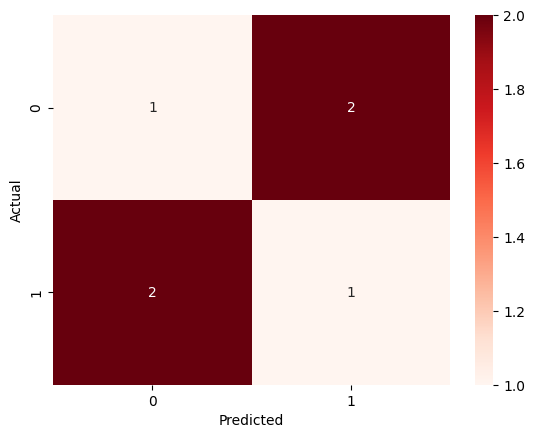

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC AUC Score: {roc_auc:.2f}')
    
    # Calculate confusion matrix and plot heatmap
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Call evaluate_model function
evaluate_model(model, X_test, y_test)


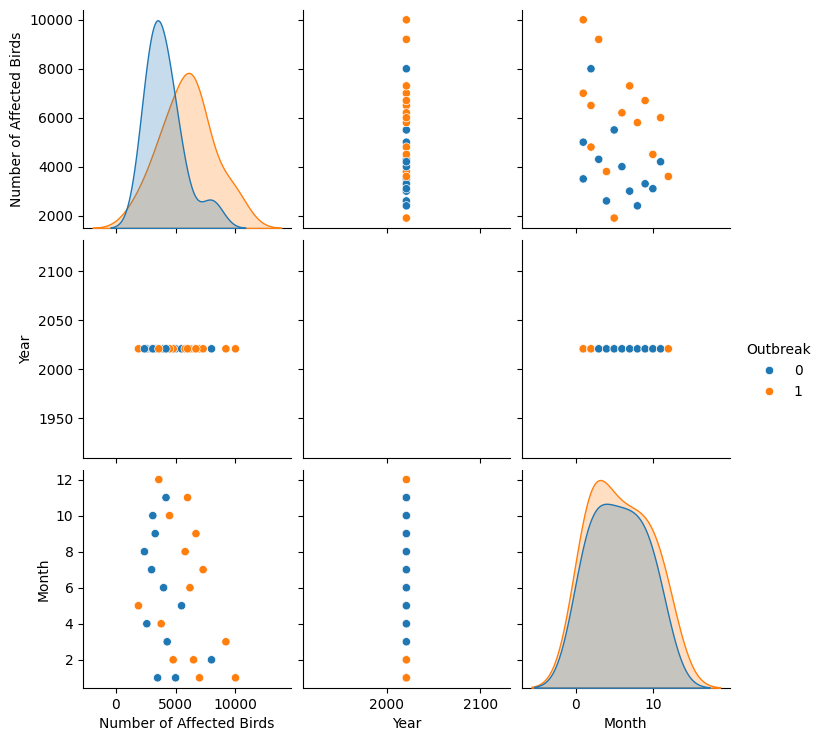

In [27]:
sns.pairplot(data, hue='Outbreak', vars=['Number of Affected Birds', 'Year', 'Month'])
plt.show()

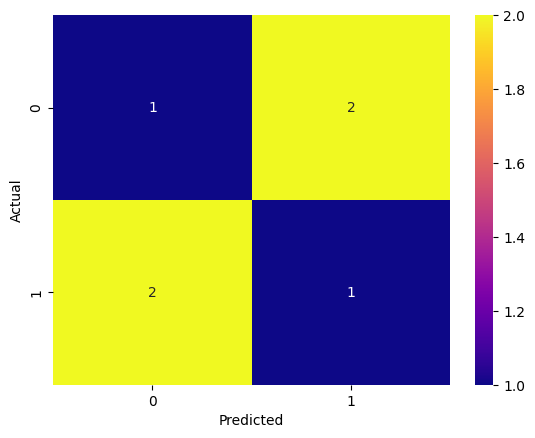

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


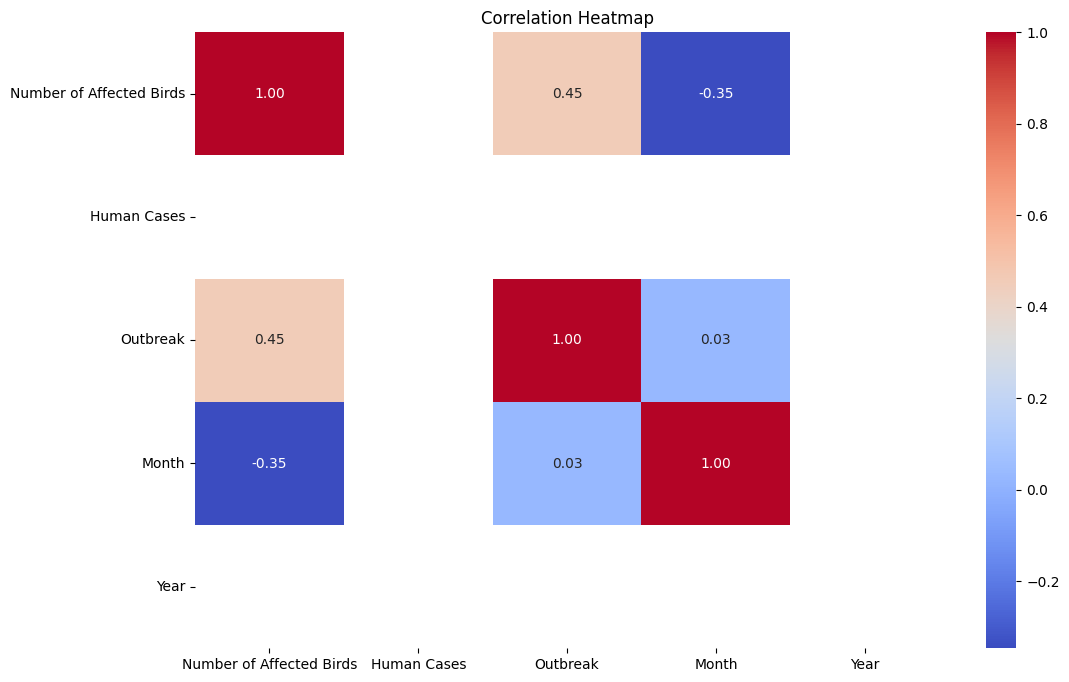

In [30]:
numeric_data = data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

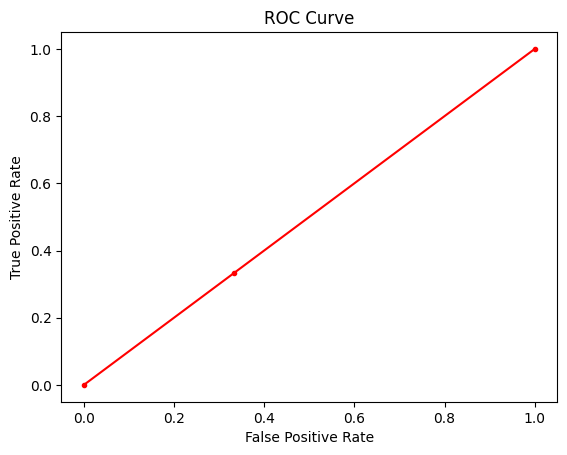

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, marker='.',color = "red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Logistic Regression (L2) Evaluation:
Accuracy: 0.50
Precision: 0.50
Recall: 0.33
F1 Score: 0.40
ROC AUC Score: 0.33


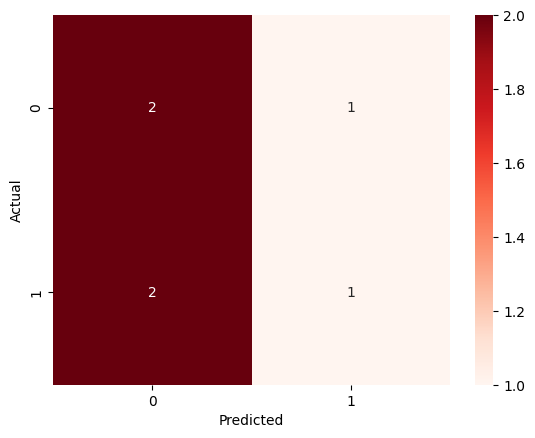

In [40]:
log_reg = LogisticRegression(max_iter=1000, penalty='l2')
log_reg.fit(X_train, y_train)
print("Logistic Regression (L2) Evaluation:")
evaluate_model(log_reg, X_test, y_test)

Decision Tree Evaluation:
Accuracy: 0.50
Precision: 0.50
Recall: 0.33
F1 Score: 0.40
ROC AUC Score: 0.50


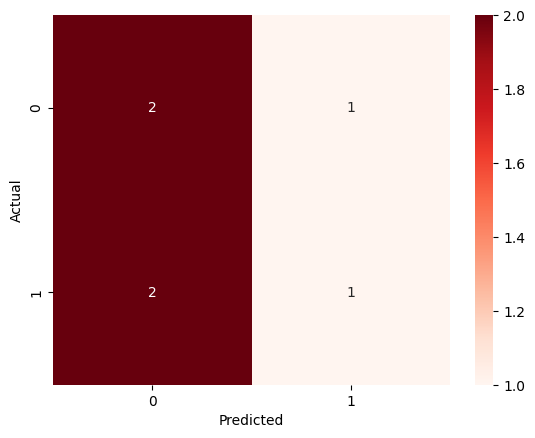

In [21]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
print("Decision Tree Evaluation:")
evaluate_model(tree, X_test, y_test)

Random Forest Evaluation:
Accuracy: 0.50
Precision: 0.50
Recall: 0.33
F1 Score: 0.40
ROC AUC Score: 0.44


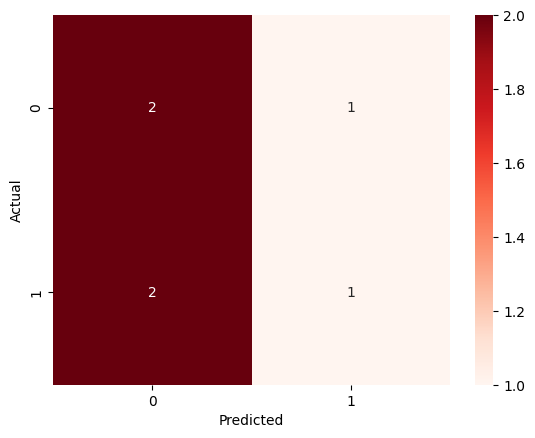

In [22]:
forest = RandomForestClassifier(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
print("Random Forest Evaluation:")
evaluate_model(forest, X_test, y_test)

Best Random Forest Evaluation:
Accuracy: 0.50
Precision: 0.50
Recall: 0.33
F1 Score: 0.40
ROC AUC Score: 0.44


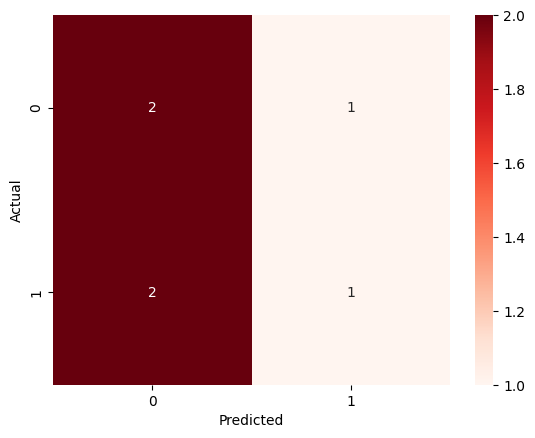

In [23]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_forest = grid_search.best_estimator_
print("Best Random Forest Evaluation:")
evaluate_model(best_forest, X_test, y_test)

In [24]:
importances = best_forest.feature_importances_
indices = np.argsort(importances)[::-1]

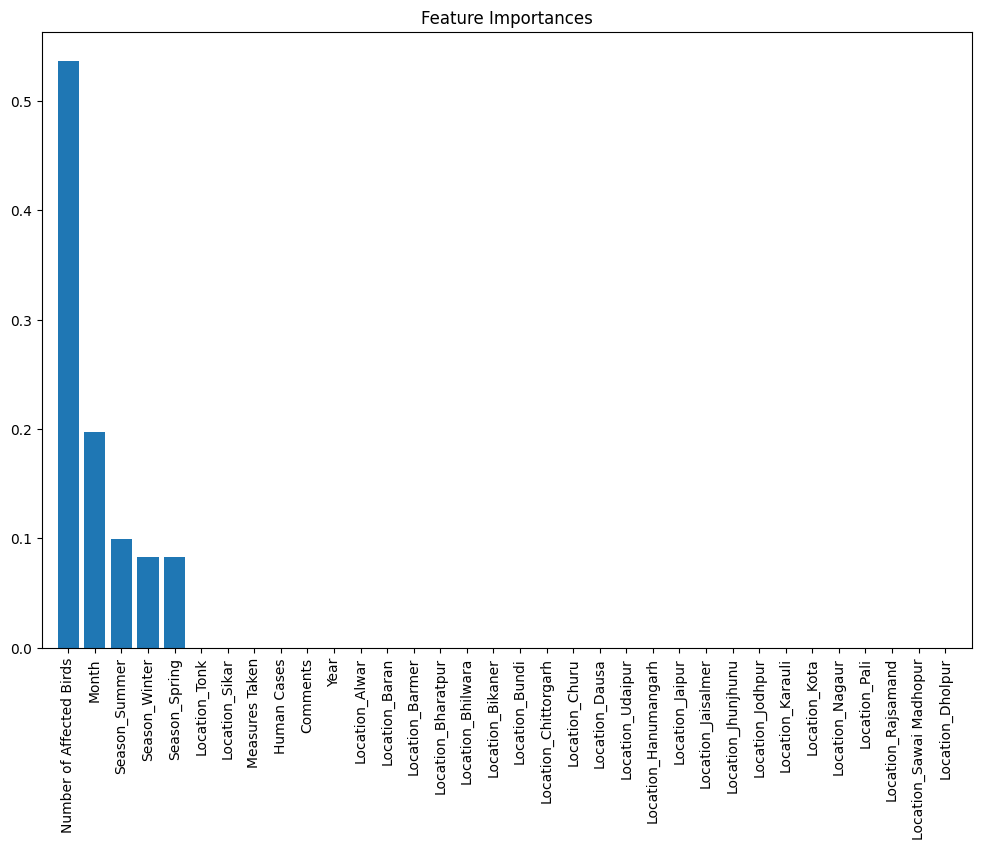

In [25]:
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()